# ES Predictive Model | Camp Korey 

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical



In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
donation_history = pd.read_csv('/content/drive/MyDrive/Individual_1819_KPI.csv')


In [51]:
es_df = pd.read_csv('/content/drive/MyDrive/EngagementScoreV2.csv', index_col=False)

In [52]:
es_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16658 entries, 0 to 16657
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16658 non-null  int64  
 1   CnBio_ID            16658 non-null  int64  
 2   Donation_Score      16658 non-null  float64
 3   Volunteering_Score  16658 non-null  float64
 4   Engagement_Score    16658 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 650.8 KB


In [53]:
es_df = es_df.reset_index()
es_df = es_df.drop(columns = ['Unnamed: 0','index'])

In [54]:
es_df = es_df.rename(columns={'CnBio_ID':'Gf_CnBio_ID'})

In [55]:
es_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16658 entries, 0 to 16657
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gf_CnBio_ID         16658 non-null  int64  
 1   Donation_Score      16658 non-null  float64
 2   Volunteering_Score  16658 non-null  float64
 3   Engagement_Score    16658 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 520.7 KB


In [56]:
donation_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gf_CnBio_ID          1804 non-null   int64  
 1   Special_Events       1804 non-null   int64  
 2   Total_Donation       1804 non-null   int64  
 3   Frequency_Donation   1804 non-null   int64  
 4   Recent_Donated_Date  1804 non-null   object 
 5   Recency              1804 non-null   int64  
 6   Last_2_Years         1804 non-null   object 
 7   Total_Donation.1     1804 non-null   float64
 8   CnAdrPrf_City        1430 non-null   object 
 9   CnAdrPrf_State       1432 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 141.1+ KB


# Merging ES with Historical KPI table

In [57]:
df = pd.merge(donation_history,es_df, on='Gf_CnBio_ID')
df.head()

,Gf_CnBio_ID,Special_Events,Total_Donation,Frequency_Donation,Recent_Donated_Date,Recency,Last_2_Years,Total_Donation.1,CnAdrPrf_City,CnAdrPrf_State,Donation_Score,Volunteering_Score,Engagement_Score
0,201822873,0,40,1,9/7/18,1695,No,40.0,Helena,MT,0.0,0.0,0.0
1,201721542,0,300,3,12/26/18,1585,No,300.0,Anacortes,WA,2.4,0.0,1.2
2,201823300,1,3750,2,7/8/19,1391,Yes,3750.0,Newport Beach,CA,0.0,0.0,0.0
3,201925782,1,100,2,8/26/19,1342,No,100.0,NaN,NaN,0.0,0.0,0.0
4,201925799,1,100,2,8/26/19,1342,No,100.0,NaN,NaN,0.0,0.0,0.0


In [58]:
df['donated_year'] = pd.DatetimeIndex(df['Recent_Donated_Date']).year

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804 entries, 0 to 1803
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gf_CnBio_ID          1804 non-null   int64  
 1   Special_Events       1804 non-null   int64  
 2   Total_Donation       1804 non-null   int64  
 3   Frequency_Donation   1804 non-null   int64  
 4   Recent_Donated_Date  1804 non-null   object 
 5   Recency              1804 non-null   int64  
 6   Last_2_Years         1804 non-null   object 
 7   Total_Donation.1     1804 non-null   float64
 8   CnAdrPrf_City        1430 non-null   object 
 9   CnAdrPrf_State       1432 non-null   object 
 10  Donation_Score       1804 non-null   float64
 11  Volunteering_Score   1804 non-null   float64
 12  Engagement_Score     1804 non-null   float64
 13  donated_year         1804 non-null   int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 211.4+ KB


In [60]:
df.describe()

,Gf_CnBio_ID,Special_Events,Total_Donation,Frequency_Donation,Recency,Total_Donation.1,Donation_Score,Volunteering_Score,Engagement_Score,donated_year
count,1.804000e+03,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,1.722593e+08,0.381375,1745.536031,2.095344,1511.576497,1745.537079,1.217184,0.073947,0.645565,2018.666851
std,7.133994e+07,0.485859,12498.047273,3.540715,217.909330,12498.047217,2.417895,0.599767,1.321699,0.471470
min,9.800000e+01,0.000000,0.000000,1.000000,1215.000000,0.010000,0.000000,0.000000,0.000000,2018.000000
25%,2.015158e+08,0.000000,58.500000,1.000000,1307.750000,58.562500,0.000000,0.000000,0.000000,2018.000000
50%,2.018227e+08,0.000000,158.000000,1.000000,1485.000000,158.200000,0.000000,0.000000,0.000000,2019.000000
75%,2.019244e+08,1.000000,500.000000,2.000000,1668.000000,500.000000,0.000000,0.000000,0.000000,2019.000000
max,2.022311e+08,1.000000,345550.000000,83.000000,1944.000000,345550.000000,9.200000,7.200000,7.900000,2019.000000


In [61]:
#Missing values
df.isnull().sum()

Gf_CnBio_ID              0
Special_Events           0
Total_Donation           0
Frequency_Donation       0
Recent_Donated_Date      0
Recency                  0
Last_2_Years             0
Total_Donation.1         0
CnAdrPrf_City          374
CnAdrPrf_State         372
Donation_Score           0
Volunteering_Score       0
Engagement_Score         0
donated_year             0
dtype: int64

In [62]:
#Overall missing values
df.isnull().sum().sum()

746

In [63]:
#Dropping the engagement score = 0
df = df[df['Engagement_Score'] != 0]

In [64]:
# Random Forest can take only 1 and 0 as input 
df['Last_2_Years'] = df['Last_2_Years'].map({'Yes': 1, 'No': 0})

<ipython-input-64-d1e6a7d950b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last_2_Years'] = df['Last_2_Years'].map({'Yes': 1, 'No': 0})


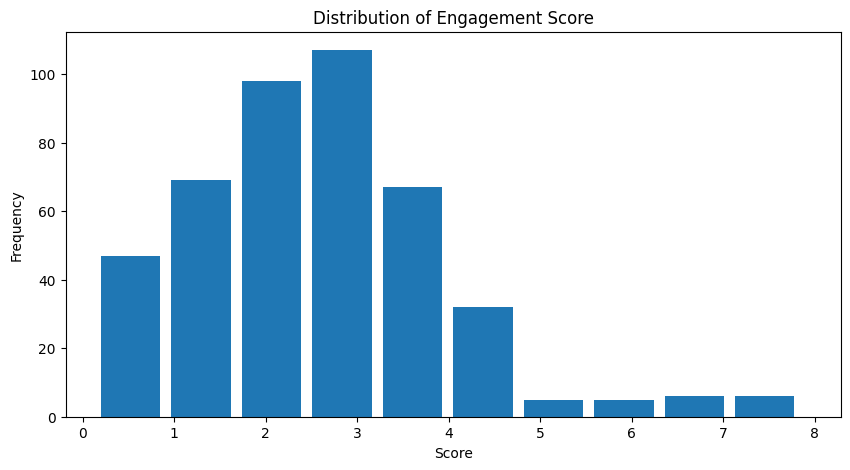

In [65]:
plt.figure(figsize = (10,5))
plt.hist(df['Engagement_Score'], width = .65)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of Engagement Score")
plt.show()

# Model Building: Random forest regression

In [66]:
features = ['Total_Donation', 'Frequency_Donation', 'Recency', 'Special_Events','Last_2_Years']
target = 'Donation_Score' #Donation_Score

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features],df[target],train_size=0.7,test_size=0.3, random_state=42)

In [68]:
#train_data[features]

In [69]:
# Define the random forest regression model
# max_features - to subset the variables, n_estimators - number of trees
rf_model = RandomForestRegressor(max_features= 3,n_estimators= 500, random_state=42) 

In [70]:
# Train the model on the training data
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, n_estimators=500, random_state=42)

In [71]:
# Predict engagement scores for the test data
y_pred = rf_model.predict(X_test) #X_test

In [72]:
df.skew().sort_values(ascending=False)

<ipython-input-72-1ddffe11183f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


Total_Donation        11.167949
Total_Donation.1      11.167947
Frequency_Donation     5.839929
Volunteering_Score     4.115263
Recency                1.159205
Engagement_Score       0.878975
Last_2_Years           0.388466
Special_Events         0.182361
Donation_Score        -0.168231
Gf_CnBio_ID           -0.943131
donated_year          -1.744731
dtype: float64

# Model Evaluation 

In [73]:
# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred) #y_test, y_pred
print('Mean Squared Error:', mse)

Mean Squared Error: 3.740070570310434


In [74]:
import math

rmse = math.sqrt(mse)
print('Root Mean Squared Error for Random Forest Model:', rmse)

Root Mean Squared Error for Random Forest Model: 1.9339262060147058


In [75]:
min(y_pred)

0.8658799999999927

In [76]:
max(y_pred)

8.595000000000002

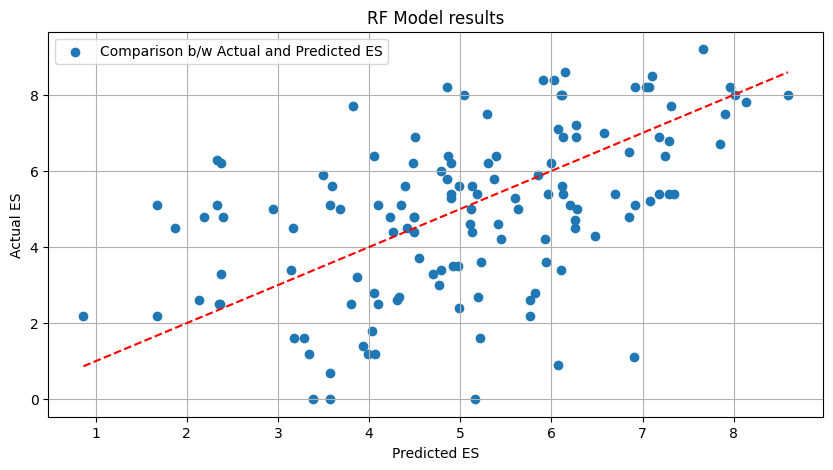

In [77]:
plt.figure(figsize = (10,5))
plt.scatter(y_pred,y_test, label='Comparison b/w Actual and Predicted ES')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--')
plt.legend()
plt.grid()
plt.xlabel('Predicted ES')
plt.ylabel('Actual ES')
plt.title("RF Model results")
plt.show()

In [78]:
# Access the actual engagement scores of the test data
test_actual_engagement_scores = y_test

In [79]:
# Print actual and predicted engagement scores
# print('Actual Engagement Scores vs. Predicted Engagement Scores:\n')
for i in range(len(y_pred)):
    print('Actual Engagement Score: {:.2f} | Predicted Engagement Score: {:.2f}'.format(y_test.iloc[i],y_pred[i]))

Actual Engagement Score: 5.10 | Predicted Engagement Score: 4.10
Actual Engagement Score: 5.40 | Predicted Engagement Score: 5.18
Actual Engagement Score: 2.60 | Predicted Engagement Score: 5.77
Actual Engagement Score: 5.40 | Predicted Engagement Score: 5.97
Actual Engagement Score: 8.40 | Predicted Engagement Score: 6.03
Actual Engagement Score: 6.50 | Predicted Engagement Score: 6.85
Actual Engagement Score: 5.40 | Predicted Engagement Score: 6.70
Actual Engagement Score: 8.20 | Predicted Engagement Score: 7.96
Actual Engagement Score: 3.50 | Predicted Engagement Score: 4.92
Actual Engagement Score: 4.80 | Predicted Engagement Score: 2.19
Actual Engagement Score: 5.00 | Predicted Engagement Score: 6.28
Actual Engagement Score: 7.70 | Predicted Engagement Score: 7.31
Actual Engagement Score: 0.00 | Predicted Engagement Score: 3.57
Actual Engagement Score: 3.30 | Predicted Engagement Score: 4.70
Actual Engagement Score: 1.60 | Predicted Engagement Score: 3.17
Actual Engagement Score: 

In [80]:
rsquare = metrics.r2_score(test_actual_engagement_scores, y_pred)
rsquare

0.18518837616034822

In [81]:
# create a dataframe of feature importances and their corresponding column names
importances_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
importances_df_rf = importances_df_rf.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
print(importances_df_rf)

              Feature  Importance
0      Total_Donation    0.443707
1             Recency    0.267903
2  Frequency_Donation    0.154839
3      Special_Events    0.103337
4        Last_2_Years    0.030214


Linear Regression Model

In [82]:
# Fit linear regression model on train set
model = LinearRegression()
lfit = model.fit(X_train, y_train)

# Predict on test set and calculate mean absolute error
lpred = lfit.predict(X_test)
mae = mean_squared_error(lpred , y_test)

print("Mean squared Error: ",mse)

Mean squared Error:  3.740070570310434


### Neural Network Model

In [83]:
# Scale the data and save as DataFrame
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [84]:
# define a neural network model 

modnn = Sequential(
    [
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.4),
    Dense(units=32, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=16, activation='relu'),
    Dense(units=1)
    ])



In [85]:
# compiling the neural network model 
modnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mean_squared_error'])

In [86]:
history = modnn.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size= 25,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 32.7798 - mean_squared_error: 32.7798 - val_loss: 27.8790 - val_mean_squared_error: 27.8790
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 30.0353 - mean_squared_error: 30.0353 - val_loss: 26.2301 - val_mean_squared_error: 26.2301
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 27.9981 - mean_squared_error: 27.9981 - val_loss: 24.3058 - val_mean_squared_error: 24.3058
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 25.7633 - mean_squared_error: 25.7633 - val_loss: 21.6046 - val_mean_squared_error: 21.6046
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 22.7051 - mean_squared_error: 22.7051 - val_loss: 18.2717 - val_mean_squared_error: 18.2717
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 18.8277 - mean_squared_error: 18.8277 - val_loss: 14.5224 - val_mean_squared_error: 14.5224
Epoch 7/1

In [87]:
# Make predictions on test set
nn_pred = modnn.predict(X_test_scaled)
mse = mean_squared_error(y_test, nn_pred)

print("Mean squared Error: ",mse)

5/5 [==============================] - 0s 2ms/step
Mean squared Error:  5.379362492915702


In [88]:
rmse = math.sqrt(mse)
print('Root Mean Squared Error for Neural Network :', rmse)

Root Mean Squared Error for Neural Network : 2.3193452724671464


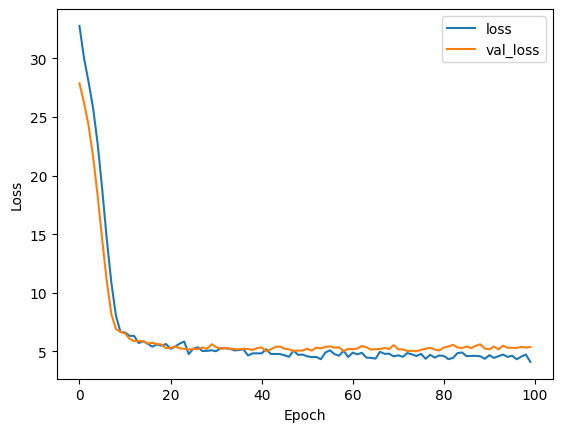

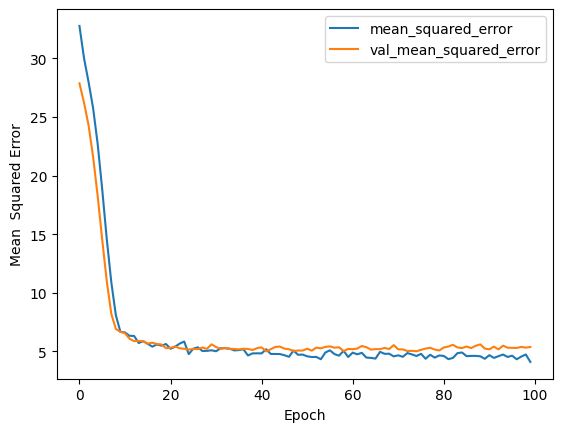

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.ylabel('Mean  Squared Error')
plt.xlabel('Epoch')
plt.legend(['mean_squared_error', 'val_mean_squared_error'], loc='upper right')
plt.show();


In [90]:
for i in range(5):
  print(i)
  print(y_test.iloc[i])
  print(nn_pred[i][0])

0
5.1000000000000005
3.4368134
1
5.4
4.097676
2
2.6
3.5141172
3
5.4
5.4422026
4
8.4
6.781746


In [91]:
# Print actual and predicted engagement scores
# print('Actual Engagement Scores vs. Predicted Engagement Scores:\n')
for i in range(len(nn_pred)):
    print("Actual value: {:.1f}, Predicted value: {:.2f}".format(y_test.iloc[i], nn_pred[i][0]))

Actual value: 5.1, Predicted value: 3.44
Actual value: 5.4, Predicted value: 4.10
Actual value: 2.6, Predicted value: 3.51
Actual value: 5.4, Predicted value: 5.44
Actual value: 8.4, Predicted value: 6.78
Actual value: 6.5, Predicted value: 6.19
Actual value: 5.4, Predicted value: 6.26
Actual value: 8.2, Predicted value: 6.66
Actual value: 3.5, Predicted value: 5.51
Actual value: 4.8, Predicted value: 4.13
Actual value: 5.0, Predicted value: 4.40
Actual value: 7.7, Predicted value: 6.19
Actual value: 0.0, Predicted value: 4.88
Actual value: 3.3, Predicted value: 3.87
Actual value: 1.6, Predicted value: 3.95
Actual value: 6.9, Predicted value: 3.94
Actual value: 6.4, Predicted value: 3.40
Actual value: 9.2, Predicted value: 6.86
Actual value: 7.0, Predicted value: 5.56
Actual value: 5.6, Predicted value: 4.44
Actual value: 0.7, Predicted value: 4.16
Actual value: 7.5, Predicted value: 7.32
Actual value: 6.2, Predicted value: 4.36
Actual value: 6.7, Predicted value: 6.39
Actual value: 5.